## Importing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import time
import joblib
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.feature_selection import  f_classif, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder,PowerTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE


# Read Data 

In [2]:
DATA_PATH = os.path.join(os.getcwd(), '..','Dataset', 'Telco_Cusomer_Churn.csv')

df = pd.read_csv(DATA_PATH)

In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [4]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

## EDA And Visilization

In [5]:
# Colums drops
#df.drop(columns=['customerid'], inplace=True, axis=1)
# Not mandatory fetures for churn prediction
df.drop(columns=['onlinesecurity', 'onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies', 'paperlessbilling','paymentmethod', 'monthlycharges','totalcharges' ], inplace=True, axis=1)

In [6]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,contract,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,Month-to-month,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,One year,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Month-to-month,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,One year,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,Month-to-month,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerid       7043 non-null   object
 1   gender           7043 non-null   object
 2   seniorcitizen    7043 non-null   int64 
 3   partner          7043 non-null   object
 4   dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   phoneservice     7043 non-null   object
 7   multiplelines    7043 non-null   object
 8   internetservice  7043 non-null   object
 9   contract         7043 non-null   object
 10  churn            7043 non-null   object
dtypes: int64(2), object(9)
memory usage: 605.4+ KB


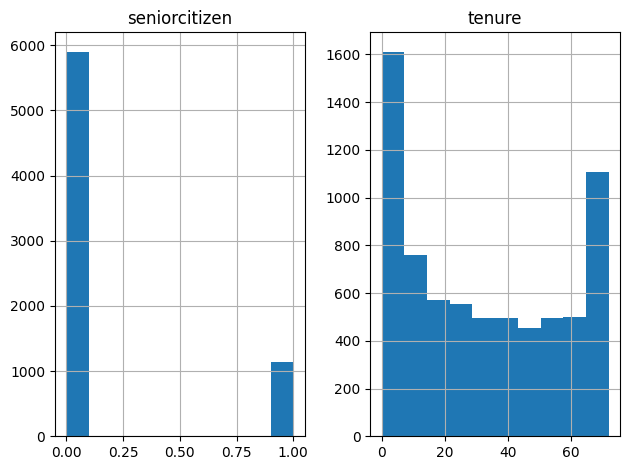

In [8]:
df.hist() 
plt.tight_layout()
plt.show()



In [9]:
# handle tenure feature distribution
# pt = PowerTransformer(method='yeo-johnson')
# df['tenure'] = pt.fit_transform(df[['tenure']])

# df.hist() 
# plt.tight_layout()
# plt.show()


In [10]:
df['seniorcitizen'] = df['seniorcitizen'].replace({1:'Yes', 0:'No'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerid       7043 non-null   object
 1   gender           7043 non-null   object
 2   seniorcitizen    7043 non-null   object
 3   partner          7043 non-null   object
 4   dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   phoneservice     7043 non-null   object
 7   multiplelines    7043 non-null   object
 8   internetservice  7043 non-null   object
 9   contract         7043 non-null   object
 10  churn            7043 non-null   object
dtypes: int64(1), object(10)
memory usage: 605.4+ KB


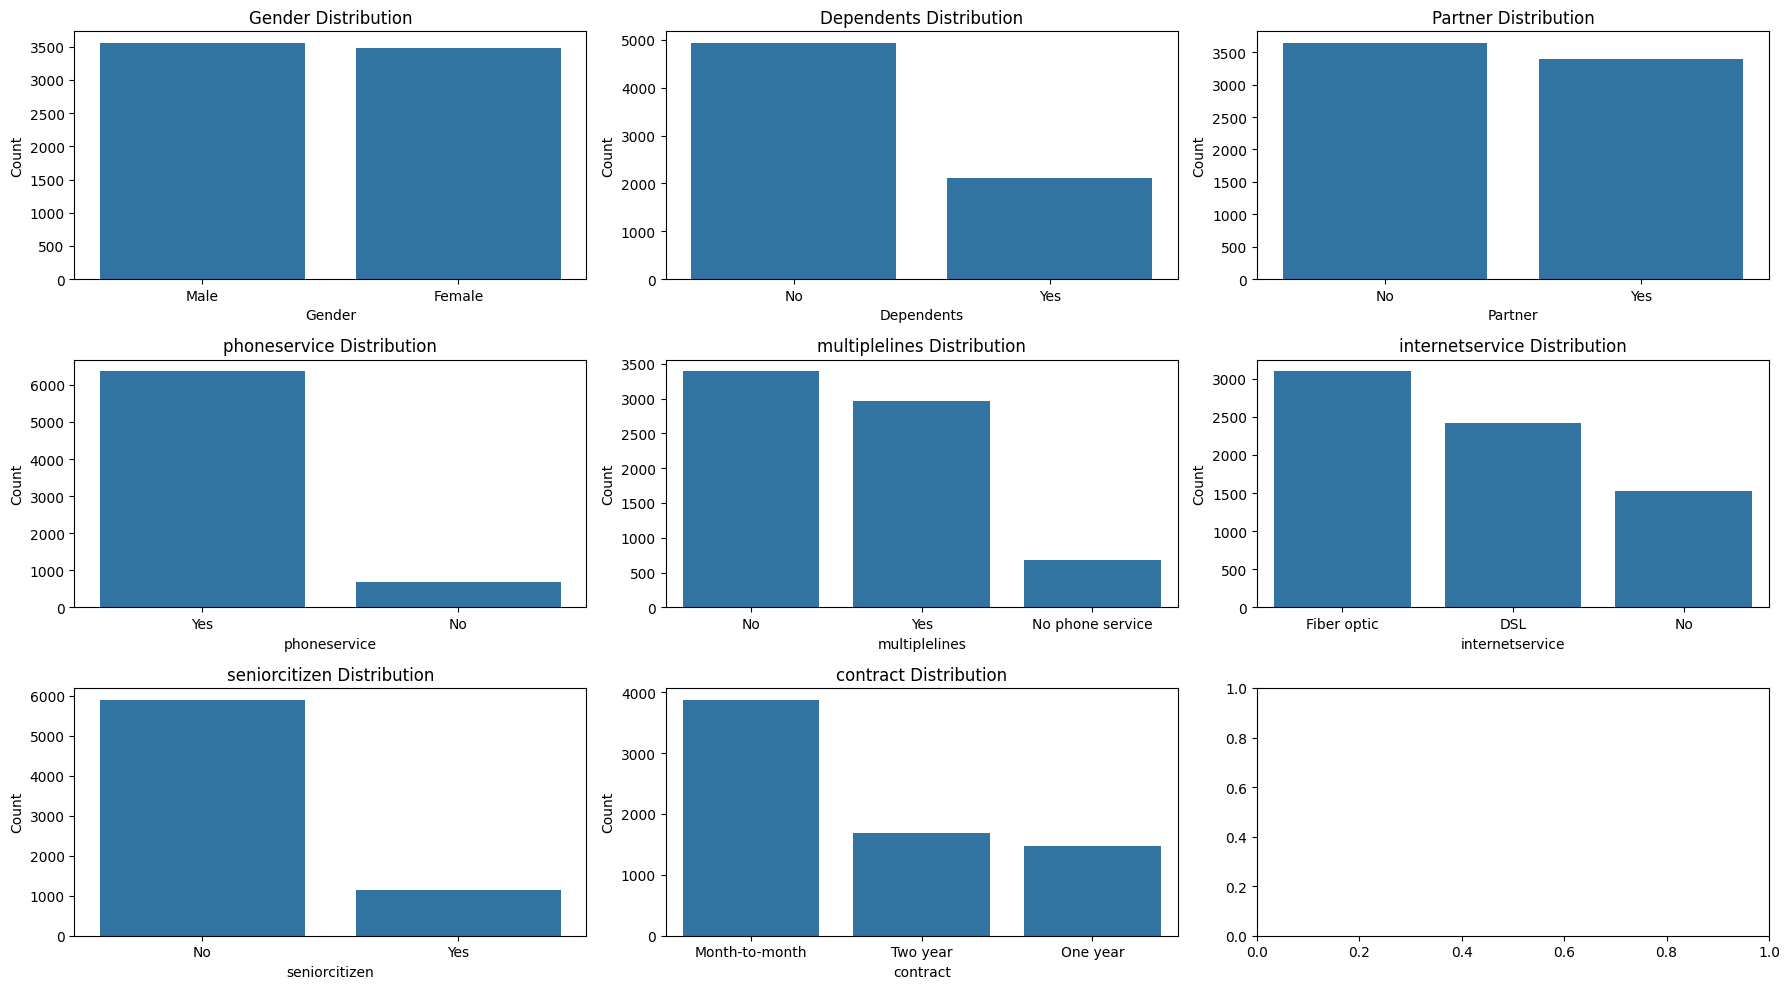

In [11]:

fig, axes = plt.subplots(3, 3, figsize=(18, 10))

# Row 1
# Gender subplot
sns.countplot(data=df, x='gender', order=df['gender'].value_counts().index.tolist(), ax=axes[0,0])
axes[0,0].set_title('Gender Distribution')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Count')

# Dependents subplot
sns.countplot(data=df, x='dependents', order=df['dependents'].value_counts().index.tolist(), ax=axes[0,1])
axes[0,1].set_title('Dependents Distribution')
axes[0,1].set_xlabel('Dependents')
axes[0,1].set_ylabel('Count')

# Partner subplot
sns.countplot(data=df, x='partner', order=df['partner'].value_counts().index.tolist(), ax=axes[0,2])
axes[0,2].set_title('Partner Distribution')
axes[0,2].set_xlabel('Partner')
axes[0,2].set_ylabel('Count')

# phoneservice subplot
sns.countplot(data=df, x='phoneservice', order=df['phoneservice'].value_counts().index.tolist(), ax=axes[1,0])
axes[1,0].set_title('phoneservice Distribution')
axes[1,0].set_xlabel('phoneservice')
axes[1,0].set_ylabel('Count')


sns.countplot(data=df, x='multiplelines', order=df['multiplelines'].value_counts().index.tolist(), ax=axes[1,1])
axes[1,1].set_title('multiplelines Distribution')
axes[1,1].set_xlabel('multiplelines')
axes[1,1].set_ylabel('Count')


sns.countplot(data=df, x='internetservice', order=df['internetservice'].value_counts().index.tolist(), ax=axes[1,2])
axes[1,2].set_title('internetservice Distribution')
axes[1,2].set_xlabel('internetservice')
axes[1,2].set_ylabel('Count')

sns.countplot(data=df, x='seniorcitizen', order=df['seniorcitizen'].value_counts().index.tolist(), ax=axes[2,0])
axes[2,0].set_title('seniorcitizen Distribution')
axes[2,0].set_xlabel('seniorcitizen')
axes[2,0].set_ylabel('Count')

sns.countplot(data=df, x='contract', order=df['contract'].value_counts().index.tolist(), ax=axes[2,1])
axes[2,1].set_title('contract Distribution')
axes[2,1].set_xlabel('contract')
axes[2,1].set_ylabel('Count')


plt.tight_layout()
plt.show()

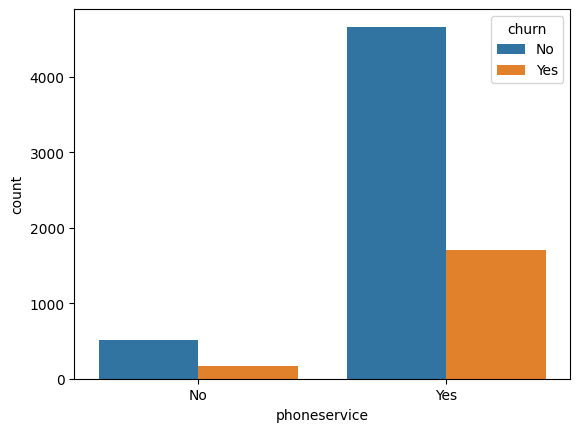

In [12]:
sns.countplot(data=df,x='phoneservice', hue='churn')  ## labels, titles
plt.show()

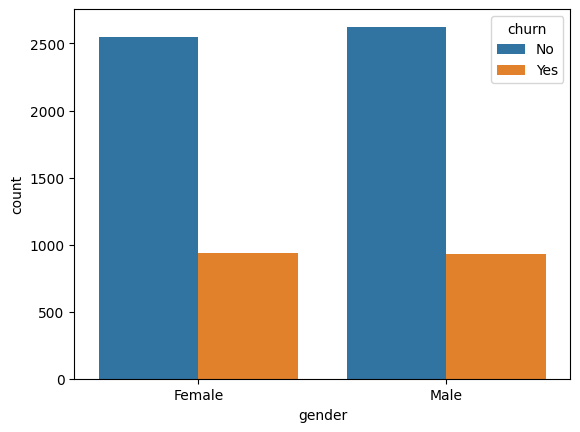

In [13]:
sns.countplot(data=df,x='gender', hue='churn')  ## labels, titles
plt.show()

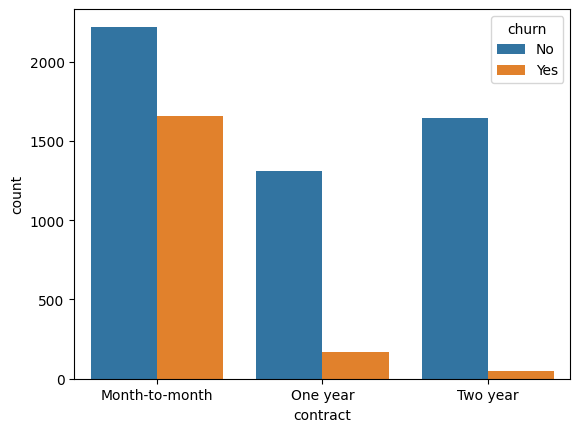

In [14]:
sns.countplot(data=df,x='contract', hue='churn')  ## labels, titles
plt.show()

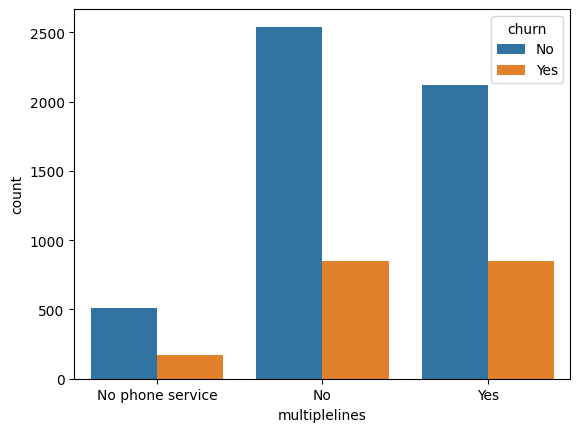

In [15]:
sns.countplot(data=df,x='multiplelines', hue='churn')  ## labels, titles
plt.show()

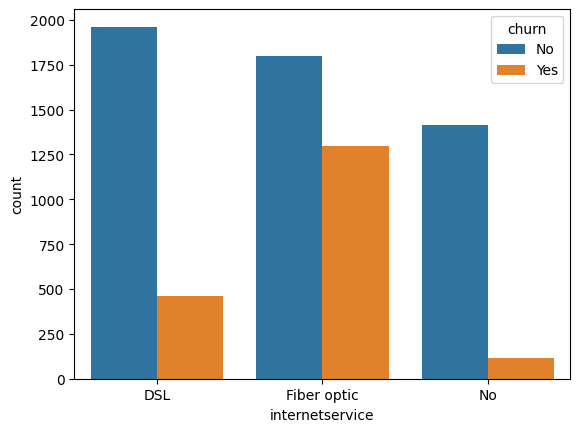

In [16]:

sns.countplot(data=df,x='internetservice', hue='churn')  ## labels, titles
plt.show()


In [17]:
df['churn'].value_counts(normalize=True) # need to handle imbalance dataset

churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [18]:
df['churn'] = df['churn'].replace({'Yes':1, 'No':0})

C:\Users\20100\AppData\Local\Temp\ipykernel_20300\1512796522.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['churn'] = df['churn'].replace({'Yes':1, 'No':0})


## Pre-Processing

In [19]:
# Split the data
X = df.drop('churn', axis=1)
y = df['churn']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check shapes
print('X_train.shape \t', x_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*10)
print('X_test.shape \t', x_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (5634, 10)
y_train.shape 	 (5634,)
******************************
X_test.shape 	 (1409, 10)
y_test.shape 	 (1409,)


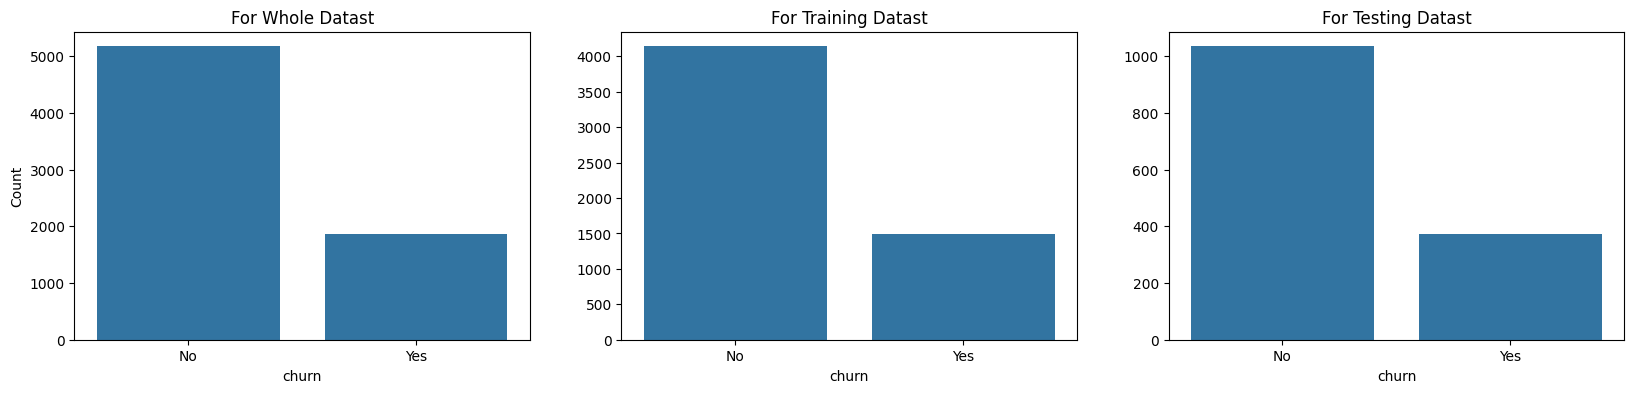

In [20]:
# plottting to check
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

# Whole dataset
plt.sca(ax[0])
sns.countplot(x=y)
plt.title('For Whole Datast')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# train
plt.sca(ax[1])
sns.countplot(x=y_train)
plt.title('For Training Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# test
plt.sca(ax[2])
sns.countplot(x=y_test)
plt.title('For Testing Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

#### Feature Selection

In [21]:
numerical_features = ['tenure']
categorical_features = ['gender','multiplelines','internetservice','contract']
ready_features = ['seniorcitizen','partner','dependents','phoneservice']




In [22]:
# Feature Selection for numerical features
_, p_values = f_classif(x_train[numerical_features], y_train)
p_values # less than 0.05 significant feature

array([8.63491975e-158])

In [23]:
_, p_values = chi2(OrdinalEncoder().fit_transform(x_train[categorical_features]), y_train)
p_values

[True if p < 0.05 else False for p in p_values]
# Gender feature seems not significant

[False, True, True, True]

In [24]:
_, p_values = chi2(OrdinalEncoder().fit_transform(x_train[ready_features]), y_train)
[True if p <0.05 else False for p in p_values]

# phoneservice seems not significant

[True, True, True, False]

In [25]:
# Try: Drop un significant features and retrain the model

#df.drop(columns=['phoneservice','gender'], inplace=True, axis=1)

In [26]:
numerical_pipline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


ready_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])


# Combine all pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipline, numerical_features),
    ('cat', categorical_pipeline, categorical_features),
    ('ready', ready_pipeline, ready_features)
])

# Fit and transform the training data
x_train_processed = preprocessor.fit_transform(x_train)
x_test_processed = preprocessor.transform(x_test)


# Save the preprocessor
joblib.dump(preprocessor, os.path.join(os.getcwd(), '..','Models', 'preprocessor.joblib'))



['d:\\work\\Machine_Learning\\MachineLearningAndDeepLearning\\Telcom_Customer_Churn_Class\\notebooks\\..\\Models\\preprocessor.joblib']

#### Handle Unbalaced Data

In [27]:
vals_count = 1 - (np.bincount(y_train) / len(y_train))
vals_count = vals_count / sum(vals_count)

dict_weights = {}
for i in range(2):  # 2 classes (0, 1)
    dict_weights[i] = vals_count[i]

# to model
dict_weights


{0: 0.26535321263755773, 1: 0.7346467873624423}

In [28]:
# 2. Using SMOTE for over sampling
over = SMOTE(k_neighbors=5, sampling_strategy=0.7, random_state=45)
X_train_processed_resampled, y_train_resampled = over.fit_resample(x_train_processed, y_train)

## Models Implementation & Evaluation

### Logistic Regression

In [29]:

lr = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=45, class_weight=dict_weights)
lr.fit(x_train_processed, y_train)



y_pred_train_lr = lr.predict(x_train_processed)
y_pred_test_lr = lr.predict(x_test_processed)



print("Logistic Regression - Training Classification Report")
print(classification_report(y_train, y_pred_train_lr))


socre_train_lr = f1_score(y_train, y_pred_train_lr)
socre_test_lr = f1_score(y_test, y_pred_test_lr)

print("-------------------------------------"*2)
print(f'The f1_score using Logistic model for Training Dataset is {socre_train_lr*100:.3f}')
print(f'The f1_score using Logistic model for Testing Dataset is {socre_test_lr*100:.3f}')



# Extract Model Report
# with open(os.path.join(os.getcwd(), '..','reports', 'logistic_regression_model_report.txt'), 'wb') as f:
#     f.write("Logistic Regression - Training Classification Report\n".encode('utf-8'))
#     f.write(classification_report(y_train_resampled, y_pred_train_lr).encode('utf-8'))
#     f.write("\n\n".encode('utf-8'))
#     f.write("--------------------------------------------------------\n".encode('utf-8'))
#     f.write(f'The f1_score using Logistic model for Training Dataset is {socre_train_lr*100:.3f}\n'.encode('utf-8'))
#     f.write(f'The f1_score using Logistic model for Testing Dataset is {socre_test_lr*100:.3f}\n'.encode('utf-8'))
   


Logistic Regression - Training Classification Report
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      4139
           1       0.50      0.80      0.62      1495

    accuracy                           0.74      5634
   macro avg       0.70      0.76      0.71      5634
weighted avg       0.80      0.74      0.75      5634

--------------------------------------------------------------------------
The f1_score using Logistic model for Training Dataset is 61.610
The f1_score using Logistic model for Testing Dataset is 60.950


In [30]:

lr = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=45)
lr.fit(X_train_processed_resampled, y_train_resampled)



y_pred_train_lr = lr.predict(X_train_processed_resampled)
y_pred_test_lr = lr.predict(x_test_processed)



print("Logistic Regression - Training Classification Report")
print(classification_report(y_train_resampled, y_pred_train_lr))


socre_train_lr = f1_score(y_train_resampled, y_pred_train_lr)
socre_test_lr = f1_score(y_test, y_pred_test_lr)

print("-------------------------------------"*2)
print(f'The f1_score using Logistic model for Training Dataset is {socre_train_lr*100:.3f}')
print(f'The f1_score using Logistic model for Testing Dataset is {socre_test_lr*100:.3f}')



# Extract Model Report
with open(os.path.join(os.getcwd(), '..','reports', 'logistic_regression_model_report.txt'), 'wb') as f:
    f.write("Logistic Regression - Training Classification Report\n".encode('utf-8'))
    f.write(classification_report(y_train_resampled, y_pred_train_lr).encode('utf-8'))
    f.write("\n\n".encode('utf-8'))
    f.write("--------------------------------------------------------\n".encode('utf-8'))
    f.write(f'The f1_score using Logistic model for Training Dataset is {socre_train_lr*100:.3f}\n'.encode('utf-8'))
    f.write(f'The f1_score using Logistic model for Testing Dataset is {socre_test_lr*100:.3f}\n'.encode('utf-8'))
   


Logistic Regression - Training Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      4139
           1       0.71      0.73      0.72      2897

    accuracy                           0.77      7036
   macro avg       0.76      0.76      0.76      7036
weighted avg       0.77      0.77      0.77      7036

--------------------------------------------------------------------------
The f1_score using Logistic model for Training Dataset is 72.313
The f1_score using Logistic model for Testing Dataset is 62.831


c:\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<Axes: >

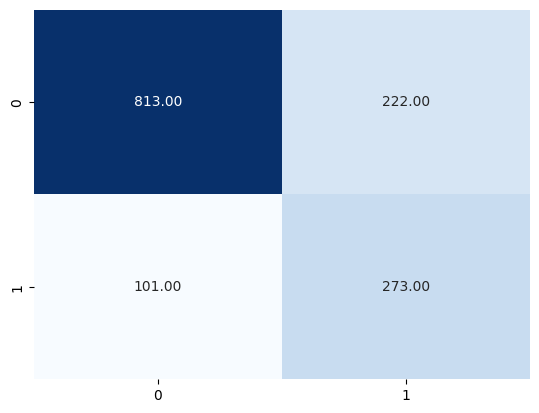

In [31]:
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred_test_lr), cmap='Blues', cbar=False, annot=True, fmt='.2f')

In [32]:
joblib.dump(lr, os.path.join(os.getcwd(), '..','Models', 'logistic_regression_model.joblib'))

['d:\\work\\Machine_Learning\\MachineLearningAndDeepLearning\\Telcom_Customer_Churn_Class\\notebooks\\..\\Models\\logistic_regression_model.joblib']

----------

### SVM

In [33]:
svm = SVC(C=1.5, random_state=45)
svm.fit(X_train_processed_resampled, y_train_resampled)

y_pred_train_svm = svm.predict(X_train_processed_resampled)
y_pred_test_svm = svm.predict(x_test_processed)

# Model Result Report 
print("SVM - Training Classification Report")
print(classification_report(y_train_resampled, y_pred_train_svm))

print("SVM - Testing Classification Report")
print(classification_report(y_test, y_pred_test_svm))


score_train_svm = f1_score(y_train_resampled, y_pred_train_svm)
score_test_svm = f1_score(y_test, y_pred_test_svm)
print("-------------------------------------"*2)
print(f'The f1_score using Logistic model for Training Dataset is {score_train_svm*100:.3f}')
print(f'The f1_score using Logistic model for Testing Dataset is {score_test_svm*100:.3f}')


# Extract Model Report
with open(os.path.join(os.getcwd(), '..','reports', 'SVM_model_report.txt'), 'wb') as f:
    f.write("SVM - Training Classification Report\n".encode('utf-8'))
    f.write(classification_report(y_train_resampled, y_pred_train_svm).encode('utf-8'))
    f.write("\n\n".encode('utf-8'))
    f.write("SVM - Testing Classification Report\n".encode('utf-8'))
    f.write(classification_report(y_test, y_pred_test_svm).encode('utf-8'))
    f.write("\n\n".encode('utf-8'))
    f.write("--------------------------------------------------------\n".encode('utf-8'))
    f.write(f'The f1_score using SVM model for Training Dataset is {score_train_svm*100:.3f}\n'.encode('utf-8'))
    f.write(f'The f1_score using SVM model for Testing Dataset is {score_test_svm*100:.3f}\n'.encode('utf-8'))
   



SVM - Training Classification Report
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      4139
           1       0.71      0.77      0.74      2897

    accuracy                           0.77      7036
   macro avg       0.77      0.77      0.77      7036
weighted avg       0.78      0.77      0.78      7036

SVM - Testing Classification Report
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1035
           1       0.54      0.75      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409

--------------------------------------------------------------------------
The f1_score using Logistic model for Training Dataset is 73.794
The f1_score using Logistic model for Testing Dataset is 63.004


<Axes: >

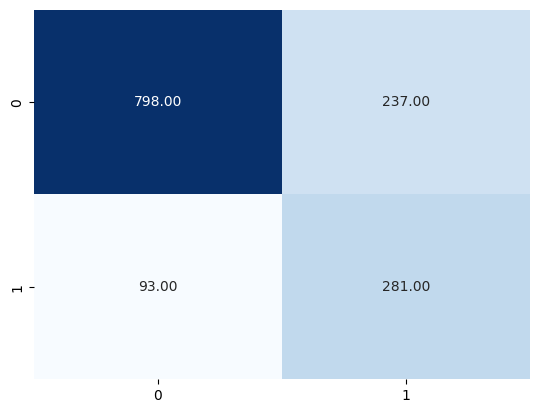

In [34]:
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred_test_svm), cmap='Blues', cbar=False, annot=True, fmt='.2f')

In [35]:
joblib.dump(svm, os.path.join(os.getcwd(), '..','Models', 'SVM_model.joblib'))

['d:\\work\\Machine_Learning\\MachineLearningAndDeepLearning\\Telcom_Customer_Churn_Class\\notebooks\\..\\Models\\SVM_model.joblib']

### XGBoost

In [52]:
xgboost = XGBClassifier(eval_metric='logloss', random_state=45, learning_rate=0.05, n_estimators=150, max_depth=5, reg_lambda=20)
xgboost.fit(X_train_processed_resampled, y_train_resampled)

y_pred_train_xgb = xgboost.predict(X_train_processed_resampled)
y_pred_test_xgb = xgboost.predict(x_test_processed)

print("XGBoost - Training Classification Report")
print(classification_report(y_train_resampled, y_pred_train_xgb))




score_train_xgb= f1_score(y_train_resampled, y_pred_train_xgb)
score_test_xgb = f1_score(y_test, y_pred_test_xgb)
print("-------------------------------------"*2)
print(f'The f1_score using Logistic model for Training Dataset is {score_train_xgb*100:.3f}')
print(f'The f1_score using Logistic model for Testing Dataset is {score_test_xgb*100:.3f}')


# Extract Model Report
with open(os.path.join(os.getcwd(), '..','reports', 'Xgboost_model_report.txt'), 'wb') as f:
    f.write("Xgboost - Training Classification Report\n".encode('utf-8'))
    f.write(classification_report(y_train_resampled, y_pred_train_xgb).encode('utf-8'))
    f.write("\n\n".encode('utf-8'))
    f.write("Xgboost - Testing Classification Report\n".encode('utf-8'))
    f.write(classification_report(y_test, y_pred_test_xgb).encode('utf-8'))
    f.write("\n\n".encode('utf-8'))
    f.write("--------------------------------------------------------\n".encode('utf-8'))
    f.write(f'The f1_score using Xgboost model for Training Dataset is {score_train_xgb*100:.3f}\n'.encode('utf-8'))
    f.write(f'The f1_score using Xgboost model for Testing Dataset is {score_test_xgb*100:.3f}\n'.encode('utf-8'))
   


XGBoost - Training Classification Report
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      4139
           1       0.72      0.79      0.75      2897

    accuracy                           0.79      7036
   macro avg       0.78      0.79      0.78      7036
weighted avg       0.79      0.79      0.79      7036

--------------------------------------------------------------------------
The f1_score using Logistic model for Training Dataset is 75.466
The f1_score using Logistic model for Testing Dataset is 64.100


<Axes: >

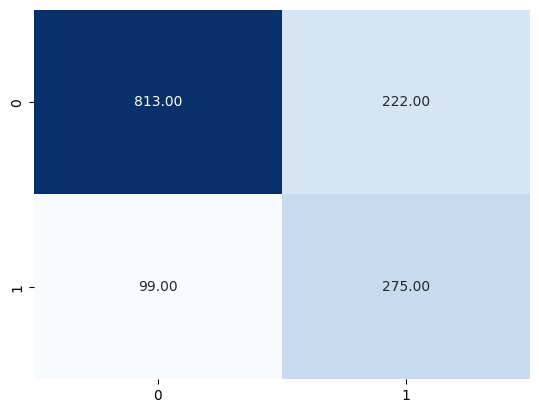

In [37]:
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred_test_xgb), cmap='Blues', cbar=False, annot=True, fmt='.2f')

In [38]:
# Model saving
joblib.dump(xgboost, os.path.join(os.getcwd(), '..','Models', 'xgboost_model.joblib'))

['d:\\work\\Machine_Learning\\MachineLearningAndDeepLearning\\Telcom_Customer_Churn_Class\\notebooks\\..\\Models\\xgboost_model.joblib']

### Random Forest

In [103]:
rf = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=45)
rf.fit(X_train_processed_resampled, y_train_resampled)

y_pred_train_rf = rf.predict(X_train_processed_resampled)
y_pred_test_rf = rf.predict(x_test_processed)

print("Random Forest - Training Classification Report")
print(classification_report(y_train_resampled, y_pred_train_rf))

score_train_rf= f1_score(y_train_resampled, y_pred_train_rf)
score_test_rf = f1_score(y_test, y_pred_test_rf)
print("-------------------------------------"*2)
print(f'The f1_score using Random Forest model for Training Dataset is {score_train_rf*100:.3f}')
print(f'The f1_score using Random Forest model for Testing Dataset is {score_test_rf*100:.3f}')


# Extract Model Report
with open(os.path.join(os.getcwd(), '..','reports', 'random_forest_model_report.txt'), 'wb') as f:
    f.write("Random Forest - Training Classification Report\n".encode('utf-8'))
    f.write(classification_report(y_train_resampled, y_pred_train_rf).encode('utf-8'))
    f.write("\n\n".encode('utf-8'))
    f.write("Random Forest - Testing Classification Report\n".encode('utf-8'))
    f.write(classification_report(y_test, y_pred_test_rf).encode('utf-8'))
    f.write("\n\n".encode('utf-8'))
    f.write("--------------------------------------------------------\n".encode('utf-8'))
    f.write(f'The f1_score using Random Forest model for Training Dataset is {score_train_rf*100:.3f}\n'.encode('utf-8'))
    f.write(f'The f1_score using Random Forest model for Testing Dataset is {score_test_rf*100:.3f}\n'.encode('utf-8'))



Random Forest - Training Classification Report
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      4139
           1       0.74      0.81      0.78      2897

    accuracy                           0.81      7036
   macro avg       0.80      0.81      0.80      7036
weighted avg       0.81      0.81      0.81      7036

--------------------------------------------------------------------------
The f1_score using Random Forest model for Training Dataset is 77.650
The f1_score using Random Forest model for Testing Dataset is 64.679


<Axes: >

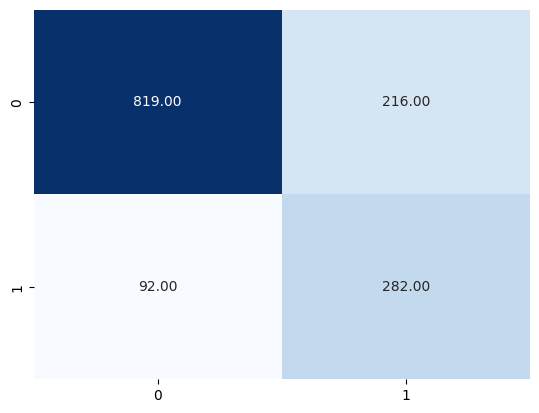

In [104]:
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred_test_rf), cmap='Blues', cbar=False, annot=True, fmt='.2f')

In [105]:
joblib.dump(rf, os.path.join(os.getcwd(), '..','Models', 'random_forest_model.joblib'))

['d:\\work\\Machine_Learning\\MachineLearningAndDeepLearning\\Telcom_Customer_Churn_Class\\notebooks\\..\\Models\\random_forest_model.joblib']

------------------------

### Fine Tuning

In [ ]:
# RF Fine Tuning using GridSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 7, 9, 11, 13],
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=45),
                                 param_grid=param_dist,
                                 cv=5,n_jobs=-1, scoring='f1',
                                 verbose=5)
grid_search_rf.fit(X_train_processed_resampled, y_train_resampled)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=45), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, 11, 13],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='f1', verbose=5)

In [43]:
grid_search_rf.best_score_, grid_search_rf.best_params_ 

(0.7394493624909415, {'max_depth': 11, 'n_estimators': 500})

In [44]:
rf_tunned_model = grid_search_rf.best_estimator_
rf_tunned_model


RandomForestClassifier(max_depth=11, n_estimators=500, random_state=45)

In [45]:
y_pred_train_rf = rf_tunned_model.predict(X_train_processed_resampled)
y_pred_test_rf = rf_tunned_model.predict(x_test_processed)


print("Random Forest - Training Classification Report")
print(classification_report(y_train_resampled, y_pred_train_rf))

print("Random Forest - Testing Classification Report")
print(classification_report(y_test, y_pred_test_rf))

score_train_rf= f1_score(y_train_resampled, y_pred_train_rf)
score_test_rf = f1_score(y_test, y_pred_test_rf)
print("-------------------------------------"*2)
print(f'The f1_score using Random Forest model for Training Dataset is {score_train_rf*100:.3f}')
print(f'The f1_score using Random Forest model for Testing Dataset is {score_test_rf*100:.3f}')


Random Forest - Training Classification Report
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4139
           1       0.79      0.84      0.81      2897

    accuracy                           0.84      7036
   macro avg       0.84      0.84      0.84      7036
weighted avg       0.84      0.84      0.84      7036

Random Forest - Testing Classification Report
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1035
           1       0.56      0.68      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409

--------------------------------------------------------------------------
The f1_score using Random Forest model for Training Dataset is 81.407
The f1_score using Random Forest model for Testing Dataset is 61.613


---------------

In [93]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 7, 9, 11, 13],
    
}

grid_search_xgboost = GridSearchCV(estimator=XGBClassifier(random_state=45, learning_rate=0.05, eval_metric='logloss', reg_lambda=20),
                                 param_grid=param_dist,
                                 cv=5,n_jobs=-1, scoring='f1',
                                 verbose=5)
grid_search_xgboost.fit(X_train_processed_resampled, y_train_resampled)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=45, ...),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, 11, 13],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='f1', verbose=5)

In [94]:
grid_search_xgboost.best_score_, grid_search_xgboost.best_params_ 

(0.7436843645982968, {'max_depth': 7, 'n_estimators': 400})

In [95]:
xgboost_tunned_model = grid_search_xgboost.best_estimator_

In [96]:
y_pred_train_xgboost = xgboost_tunned_model.predict(X_train_processed_resampled)
y_pred_test_xgboost = xgboost_tunned_model.predict(x_test_processed)


print("Random Forest - Training Classification Report")
print(classification_report(y_train_resampled, y_pred_train_xgboost))

print("Random Forest - Testing Classification Report")
print(classification_report(y_test, y_pred_test_xgboost))

score_train_rf= f1_score(y_train_resampled, y_pred_train_xgboost)
score_test_rf = f1_score(y_test, y_pred_test_xgboost)
print("-------------------------------------"*2)
print(f'The f1_score using Random Forest model for Training Dataset is {score_train_rf*100:.3f}')
print(f'The f1_score using Random Forest model for Testing Dataset is {score_test_rf*100:.3f}')

Random Forest - Training Classification Report
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      4139
           1       0.76      0.82      0.79      2897

    accuracy                           0.82      7036
   macro avg       0.81      0.82      0.82      7036
weighted avg       0.82      0.82      0.82      7036

Random Forest - Testing Classification Report
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.55      0.70      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409

--------------------------------------------------------------------------
The f1_score using Random Forest model for Training Dataset is 78.960
The f1_score using Random Forest model for Testing Dataset is 62.028
